In [164]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [165]:
#import scores and stadiums csv files as dataframe
scores_df=pd.read_csv('../project_one/Resources/spreadspoke_scores.csv')
stadium_df=pd.read_csv('../project_one/Resources/nfl_stadiums.csv', encoding="utf-8")

# Check the two dataframes
#scores_df.info()
#stadium_df.info()

In [166]:
# Merge scores and stadiums datframes

# The two daraframes have different columns names containg stadium names. Rename one so they match for merging
scores_df.rename(columns = {'stadium':'stadium_name'}, inplace = True)

# Merge two dataframes left on stadium_name
data_df=pd.merge(scores_df, stadium_df, how='left', on='stadium_name' )

#check the merged data
#data_df.info()

In [167]:
# Clean data

# Remove columns not being used for this project

# Define columns to be dropped
drop_list=['stadium_elevation', 
           'stadium_azimuthangle', 
           'stadium_weather_station_name',
           'stadium_weather_station',
           'stadium_weather_station_zipcode',
           'stadium_address',
           'stadium_close',
           'stadium_open',
           'over_under_line',
           'spread_favorite',
           'team_favorite_id',
            ]

# Drop the selected columns
data_df=data_df.drop(drop_list, axis='columns')

# Drop home/away, keep only neutral site games,  <- dataframe for Super Bowl question (Brian!!!!)
super_bowl_data_df=data_df.loc[data_df['schedule_week']=='Superbowl']

# Drop neutral site games, keep only home/away <- main dataframe for most questions
data_df=data_df.loc[data_df['stadium_neutral']==False]

# Check the dataframe
#data_df.info()
#super_bowl_data_df.info()

In [168]:
# Check the dataframe to make sure columns were dropped
#data_df.info()


In [169]:
# Add a empty column home_result
data_df["home_result"]=''

In [170]:
# Move new column over to be beside the home and away scores
data_df=data_df.iloc[:,[0,1,2,3,4,5,6,7,21,8,9,10,11,12,13,14,15,16,17,18,19,20]]

#Check coulmn has been added and is in the correct place
#data_df.info()

In [171]:
# Fill column home_result to show if home team won (W), lost (L) or tied (T) 
# based on relationship between home score and away score

data_df['home_result'] = data_df.apply(lambda x:'Win' if x['score_home'] > x['score_away'] else "Loss or Tie",axis=1)

# Check 
#data_df.head()


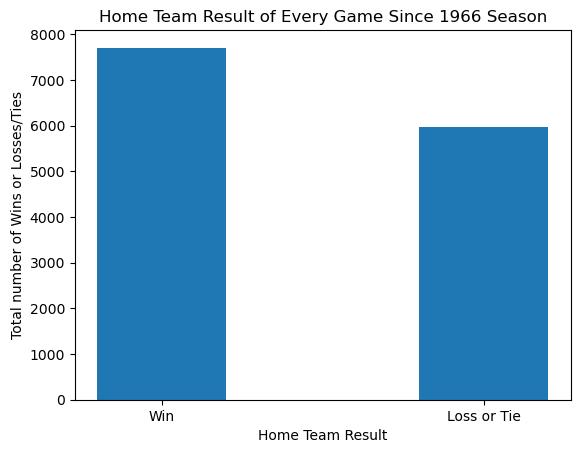

In [172]:
# Bar chart of total home wins and total losses/ties for entire dataset


# Make small dataframe with total numbers of Wins or Losses/Ties from main dataframe
summary=pd.DataFrame(data_df['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

# Plot bar graph
plt.bar(result, counts, width = 0.4)

plt.xlabel('Home Team Result')
plt.ylabel('Total number of Wins or Losses/Ties')
plt.title("Home Team Result of Every Game Since 1966 Season")

plt.show()

